In [1]:
import logging
logging.getLogger().setLevel(logging.ERROR)
from pathlib import Path
import numpy as np
from pprint import pprint
from docembedder.preprocessor.preprocessor import Preprocessor
from docembedder.utils import run_models
from docembedder.models import TfidfEmbedder
from docembedder.utils import SimulationSpecification
from docembedder import DataModel
from docembedder.analysis2 import DocAnalysis
from docembedder.visualization import plot_cpc_correlations

In [2]:
data_dir =  Path("..", "data")
output_dir = Path("..", "data", "results")
output_fp = output_dir / "tfidf.h5"
cpc_fp = Path(data_dir / "GPCPCs.txt")
patent_dir = Path(data_dir / "unprocessed")
output_dir.mkdir(exist_ok=True)

In [3]:
models = {
    "tfidf-default": TfidfEmbedder(),
    "tfidf-stem": TfidfEmbedder(stem=True),
    "tfidf-bigram": TfidfEmbedder(ngram_max=2),
    "tfidf-nostop": TfidfEmbedder(stop_words=None),
    "tfidf-norml2": TfidfEmbedder(norm="l2"),
    "tfidf-sublin": TfidfEmbedder(sublinear_tf=True),
    "tfidf-mindf2": TfidfEmbedder(min_df=2),
    "tfidf-mindf4": TfidfEmbedder(min_df=4),
    "tfidf-maxdf90": TfidfEmbedder(max_df=0.9),
}

In [4]:
%%time

sim_spec = SimulationSpecification(1838, 1950, window_size=4, debug_max_patents=1000)
run_models(models, sim_spec, patent_dir, output_fp, cpc_fp)

CPU times: user 188 ms, sys: 13.3 ms, total: 201 ms
Wall time: 197 ms


504it [00:00, 7933.62it/s]

{'tfidf-bigram': 0.13609514631269296,
 'tfidf-default': 0.14212245604263626,
 'tfidf-maxdf90': 0.14479302045430315,
 'tfidf-mindf2': 0.14220090671517954,
 'tfidf-mindf4': 0.141928289288164,
 'tfidf-norml2': 0.13053594618589545,
 'tfidf-nostop': 0.08998575356753305,
 'tfidf-stem': 0.10054542575542559,
 'tfidf-sublin': 0.15075032227208215}


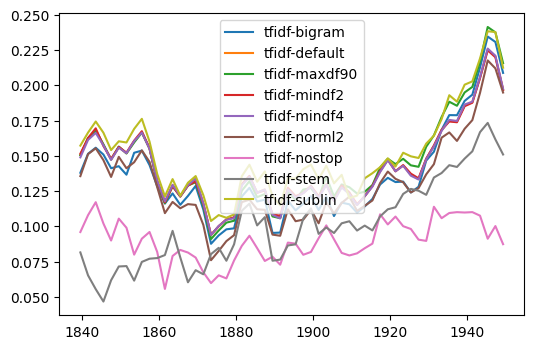

In [5]:
with DataModel(output_fp, read_only=False) as data:
    analysis = DocAnalysis(data)
    correlations = analysis.cpc_correlations()
    pprint({model_name: np.mean(cor["correlations"]) for model_name, cor in correlations.items()})
    plot_cpc_correlations(correlations)